Let's first setup our imports

In [26]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import classification_report



%matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
iris = datasets.load_iris()

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [4]:
X = iris.data[:,:]
Y = iris.target

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

In [ ]:
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)


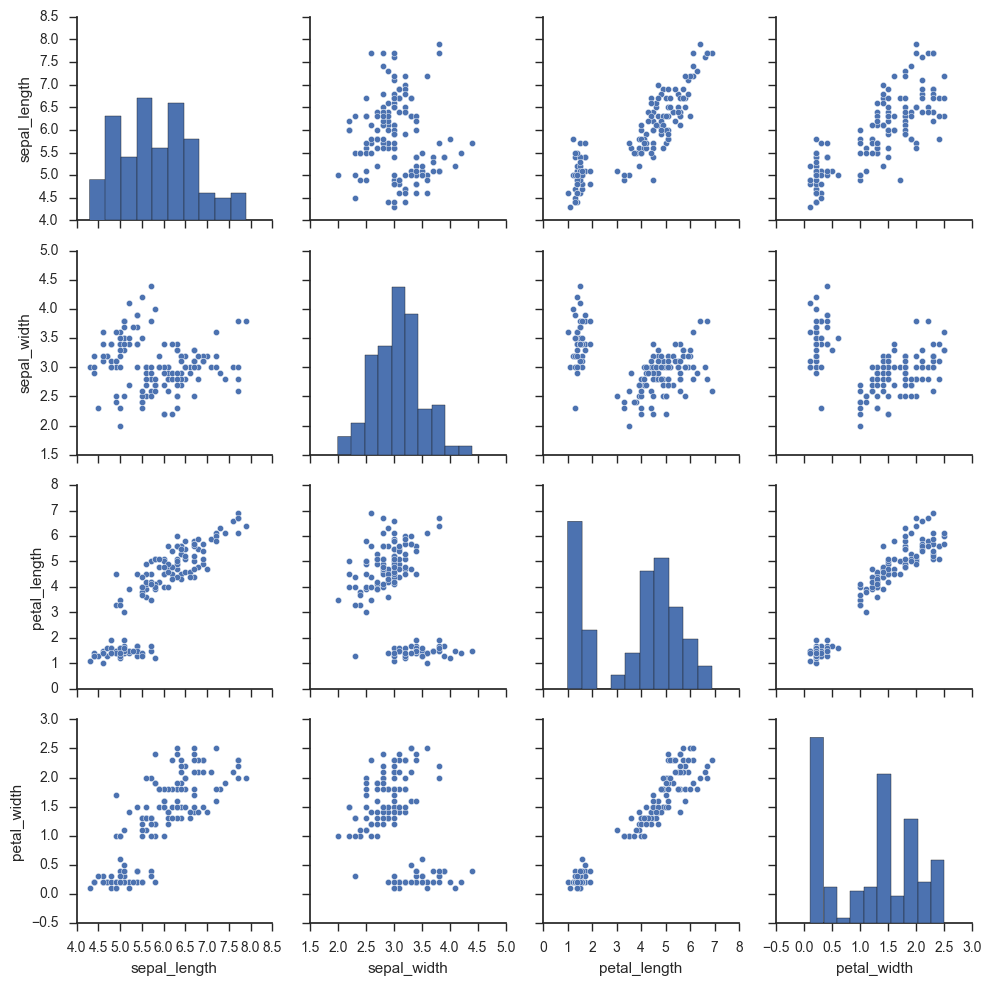

In [13]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

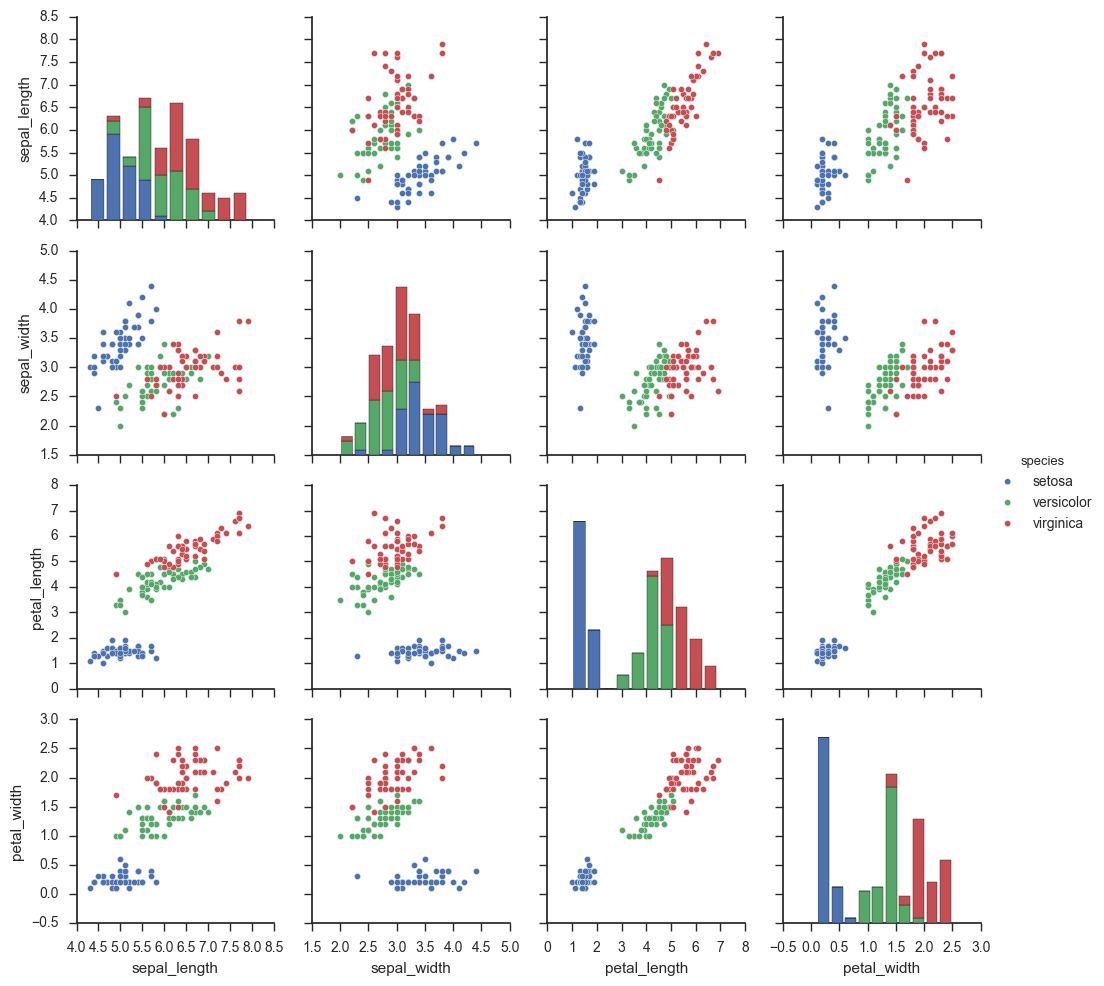

In [14]:
g = sns.pairplot(iris, hue="species")

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [17]:
k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

Compute the labels and centroids

In [19]:
from scipy import stats
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = stats.mode(Y[mask])[0]

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

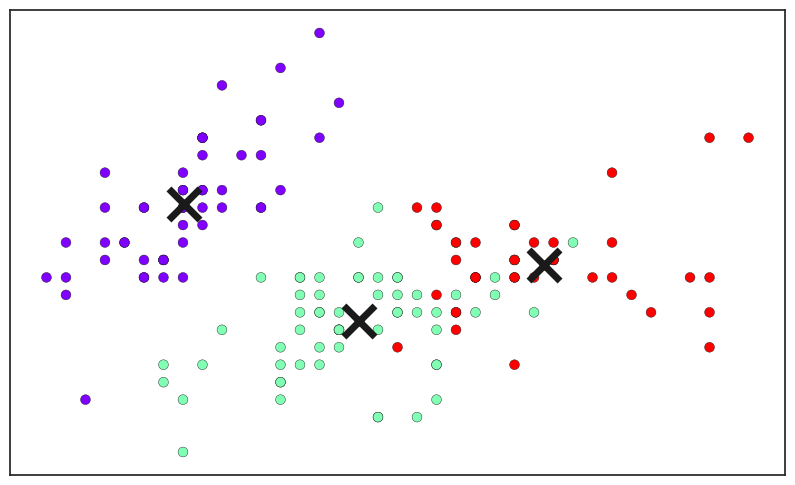

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow');
ax.set_xticks([]);
ax.set_yticks([]);

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10)

Plot the predicted vs actual classifcations to see how our clustering analysis compares

In [22]:
df = pd.DataFrame(zip(Y, labels), columns=['true','pred'])
df['correct'] = df.apply(lambda x: 1 if x['true'] == x['pred'] else 0, axis=1)
df

,true,pred,correct
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


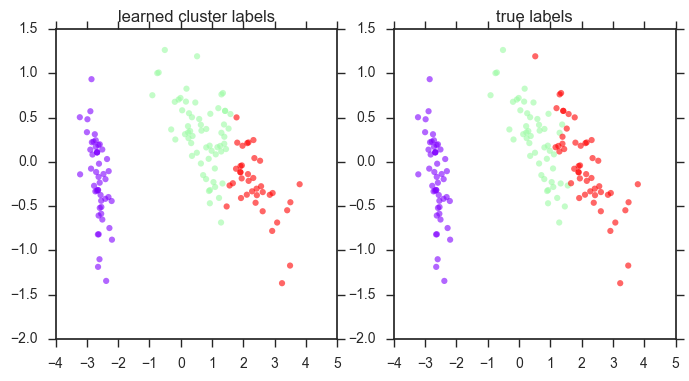

In [35]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(X)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=Y, **kwargs)
ax[1].set_title('true labels');

Check the centroids to see where each cluster is lying 

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

In [31]:
accuracy_score(Y, labels)

0.89333333333333331

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [30]:
silhouette_score(X, Y)

0.50325069804662481

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [29]:
print classification_report(Y, labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



Compute the Confusion Matrix to test the performance of the clustering analysis

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


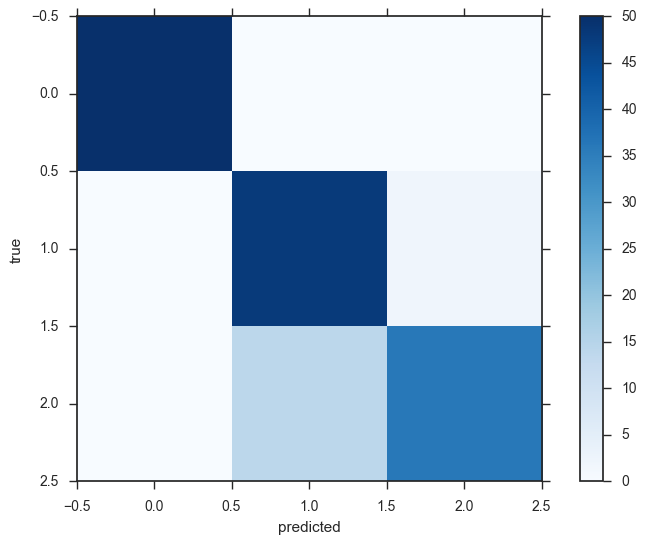

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
print(confusion_matrix(Y, labels))
plt.imshow(confusion_matrix(Y, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');